## Data Exploration and Analysis

In [1]:
# Importing some important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
pd.set_option('display.max.columns', None)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df = pd.read_csv('diabetes.csv')
pd.set_option('display.max.columns', None)
df.head()

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape

(6362620, 11)

We can see that from the above cells the dataset has 11 columns and more than 6 million rows.

This is the basic information about the dataset gotten from kaggle:

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in any of the columns of the dataset.

In [12]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

We can see that the number of fraudulent cases in the dataset is really small with only 8213 transactions out of over 6 million transactions is tagged as fraud. Therefore the dataset is highly imbalanced and some workarounds we have to be applied to fix this problem.

In [14]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [19]:
df["isFraud"].unique()

array([0, 1])

In [66]:
len(df["type"].unique())

5

In [43]:
df["type"].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

We have 5 unique columns in the "type" columns namely:
- PAYMENT
- TRANSFER 
- CASH_OUT 
- DEBIT 
- CASH_IN

These represent the type of transaction carried out in the dataset. We will be creating a new dataframe with these values converted to numerical datatypes.

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Visualization

**1. Transaction Amount vs Fraud**

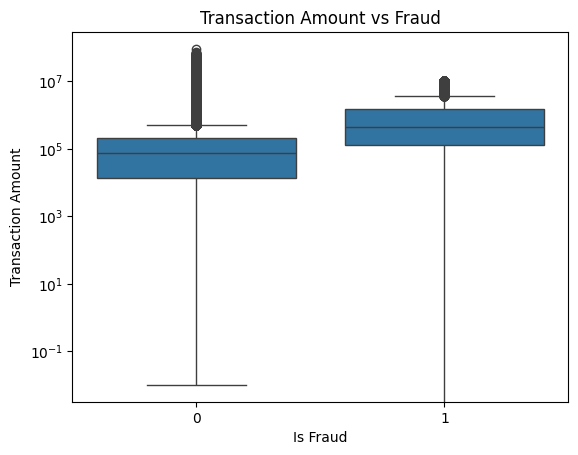

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='isFraud', y='amount', data=df)
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.yscale('log')  # optional: to handle skew
plt.savefig("amount_vs_fraud.png")
plt.show()

**2. Transaction Type vs Fraud Count**

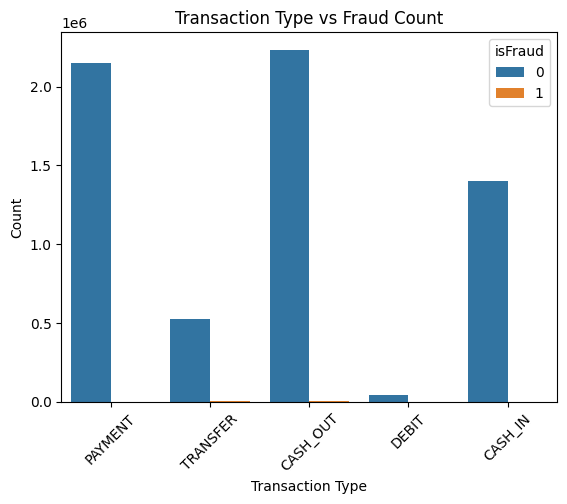

In [83]:
sns.countplot(x='type', hue='isFraud', data=df)
plt.title("Transaction Type vs Fraud Count")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig("type_vs_fraud.png")
plt.show()

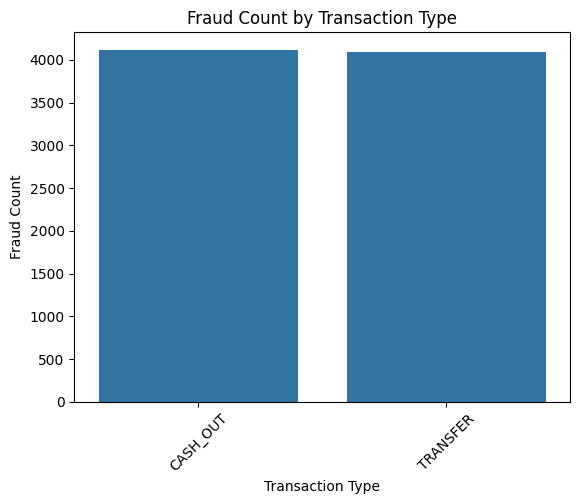

In [84]:
fraud_df = df[df['isFraud'] == 1]

sns.countplot(x='type', data=fraud_df, order=fraud_df['type'].value_counts().index)
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.savefig("type_vs_fraud.png")

plt.show()

**3. Step (Time) vs Number of Frauds**

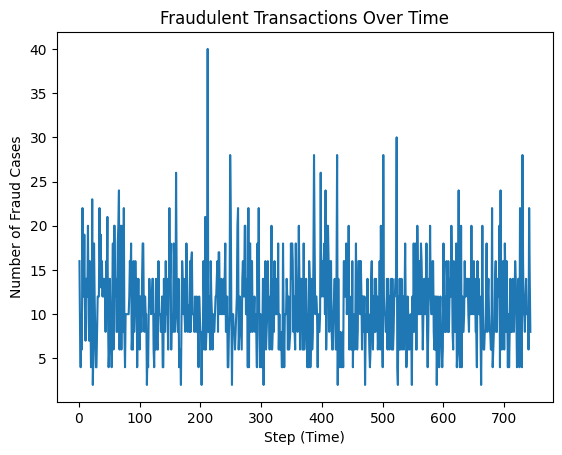

In [85]:
fraud_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
sns.lineplot(x=fraud_per_step.index, y=fraud_per_step.values)
plt.title("Fraudulent Transactions Over Time")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Fraud Cases")
plt.savefig("fraud_transaction_over_time.png")
plt.show()

**4. Old vs New Balance for Origin Accounts**

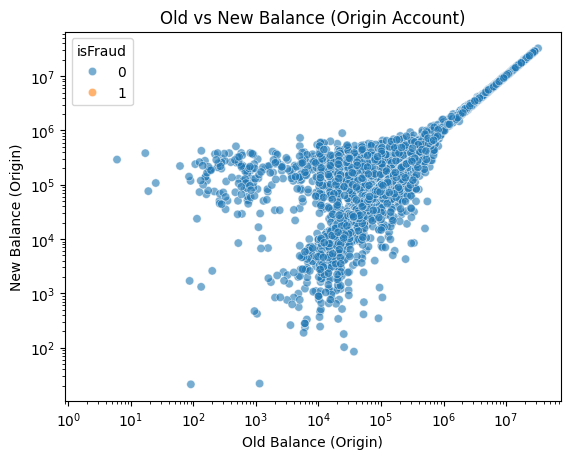

In [37]:
sns.scatterplot(data=df.sample(10000), x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', alpha=0.6)
plt.title("Old vs New Balance (Origin Account)")
plt.xlabel("Old Balance (Origin)")
plt.ylabel("New Balance (Origin)")
plt.xscale('log')
plt.yscale('log')
plt.show()

**5. Old vs New Balance for Destination Accounts**

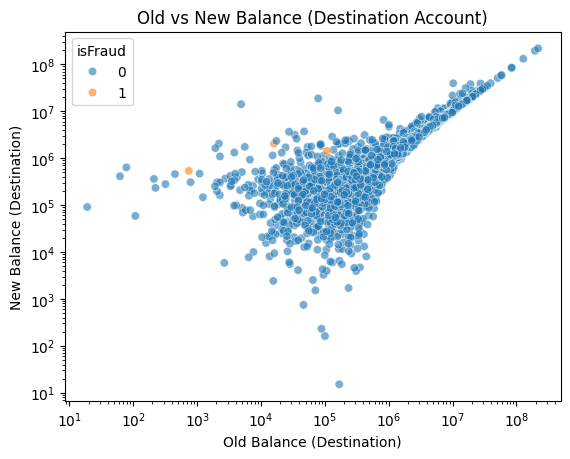

In [38]:
sns.scatterplot(data=df.sample(10000), x='oldbalanceDest', y='newbalanceDest', hue='isFraud', alpha=0.6)
plt.title("Old vs New Balance (Destination Account)")
plt.xlabel("Old Balance (Destination)")
plt.ylabel("New Balance (Destination)")
plt.xscale('log')
plt.yscale('log')
plt.show()

**6. Correlation Heatmap (Excluding Names)**

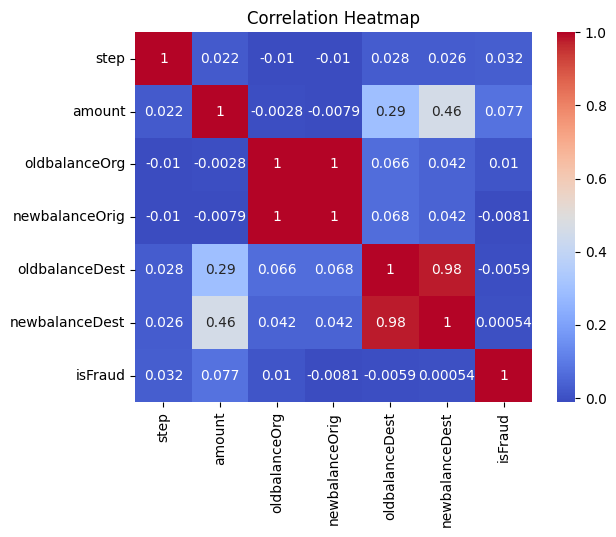

In [86]:
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("correlation.png")
plt.show()

## Model Building and Evaluation

### Feature Engineering
The "type" column in the dataset contains categorical data namely:
- PAYMENT
- TRANSFER
- CASH_OUT
- DEBIT
- CASH_IN

We will be using label encoding to convert the categorical data to numerical datatype.

In [44]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [45]:
data = df.copy(deep = True)

In [46]:
# get all categorical columns in the dataframe
catCols = [col for col in data.columns if data[col].dtype=="O"]
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for item in catCols:
    data[item] = lb_make.fit_transform(data[item])


In [24]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


The type column has now been converted from a categorical datatype to numerical datatype using label encoding.

- PAYMENT = 3
- TRANSFER = 4
- CASH_OUT = 1
- DEBIT = 2
- CASH_IN = 0

In [47]:
# The function below will be used to evaluate different metrics of the algorithms used here.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    

    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)
    

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

X = data.drop('isFraud', axis=1)
y = data.isFraud


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Unique predicted labels:  [0]
Accuracy Score:  0.9986904765646856
Precision Score:  0.0
Recall Score:  0.0
F1 Score:  0.0
Confusion Matrix:  [[1588572       0]
 [   2083       0]]


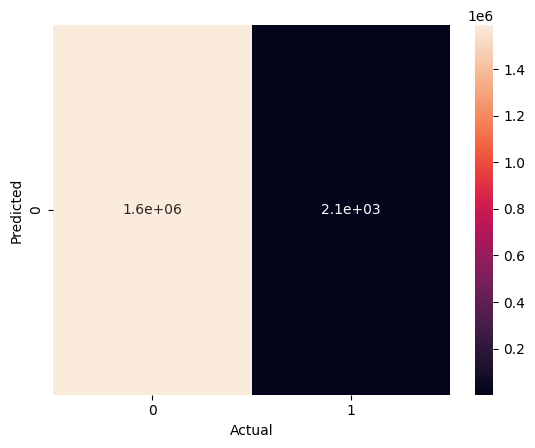

In [49]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
evaluate_model(y_test, dummy_pred)

As we can see the Dummy classifier accurately predicts non-fraudulent transactions with an accuracy of 99.8% but that is not our focus. We need to be able to accurately predict fraudulent transactions.

### Logistic Regression
Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [50]:
# Modeling the data as is
# Train model
lr = LogisticRegression()
model1 = lr.fit(X_train, y_train)
 
# Predict on training set
lr_pred = model1.predict(X_test)

Accuracy Score:  0.9986904765646856
Precision Score:  0.5
Recall Score:  0.32453192510801726
F1 Score:  0.3935953420669578
Confusion Matrix:  [[1587896     676]
 [   1407     676]]


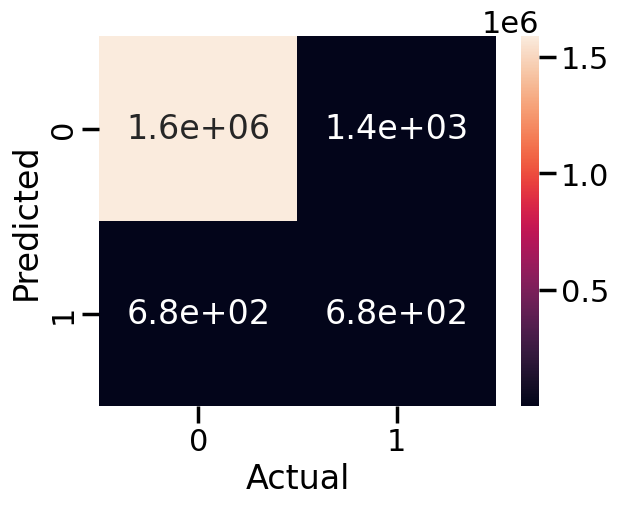

In [29]:
evaluate_model(y_test, lr_pred)

In [51]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0
0    1589303
1       1352
Name: count, dtype: int64

In [52]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,1587896,676
1,1407,676


The Logistic Regression Model performs quite well but the recall score is still very low. More work needs to be done with the dataset.

### Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [53]:
X_test.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
177267,12,3,19828.65,0.0,0.0,0.00,0.00,0
6185488,567,1,231664.11,0.0,0.0,2102969.36,2334633.47,0
5765101,400,1,464252.36,36811.0,0.0,4545071.46,5009323.82,0
4830191,347,1,173494.61,223.0,0.0,20401.87,193896.48,0
6268533,617,1,121178.30,324.0,0.0,6589213.30,6710391.60,0


Accuracy Score:  0.9996957228311607
Precision Score:  0.9824984912492456
Recall Score:  0.7815650504080653
F1 Score:  0.8705882352941177
Confusion Matrix:  [[1588543      29]
 [    455    1628]]


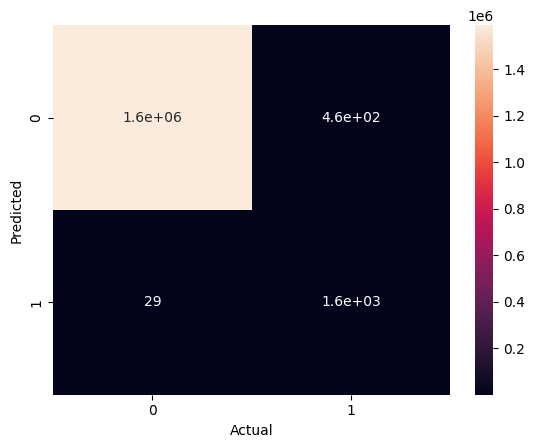

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

evaluate_model(y_test, rfc_pred)

In [55]:
# Checking unique values
predictions = pd.DataFrame(rfc_pred)
predictions[0].value_counts()

0
0    1588998
1       1657
Name: count, dtype: int64

In [56]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,1588543,29
1,455,1628


We can see that the Random Forest had the best scores so far across different metrics with a recall score of 77% and an F1 score of 86%. The next sections will look at the extreme gradient boosting classifier and gradient boosted tree classifier.

### XGBoost

In [59]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:03
Note: you may need to restart the kernel to use updated packages.


In [62]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree = 1.0,
                    learning_rate = 0.1,
                    max_depth =4,
                    n_estimators = 500,
                    subsample = 1.0)

eval_set = [(X_test, y_test)]

xgb1.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Accuracy Score:  0.9997661340768426
Precision Score:  0.9651984774333877
Recall Score:  0.8521363418146903
F1 Score:  0.9051504334523203
Confusion Matrix:  [[1588508      64]
 [    308    1775]]


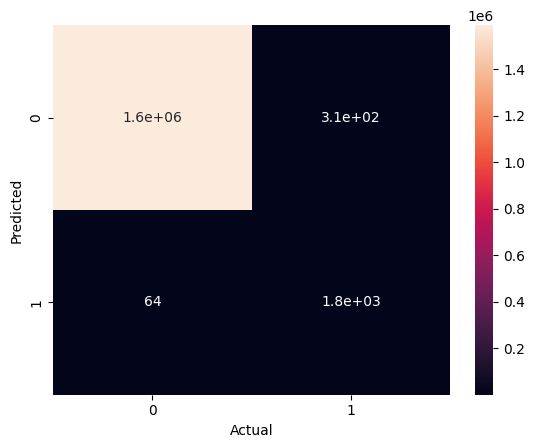

In [63]:
pred6 = xgb1.predict(X_test)
evaluate_model(y_test, pred6)

In [64]:
# Checking unique values
predictions = pd.DataFrame(pred6)
predictions[0].value_counts()

0
0    1588816
1       1839
Name: count, dtype: int64

In [65]:
pd.DataFrame(confusion_matrix(y_test, pred6))

,0,1
0,1588508,64
1,308,1775


### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


Accuracy Score:  0.9996881787691234
Precision Score:  0.9017721518987342
Recall Score:  0.8550168026884302
F1 Score:  0.877772301626417
Confusion Matrix:  [[1588378     194]
 [    302    1781]]


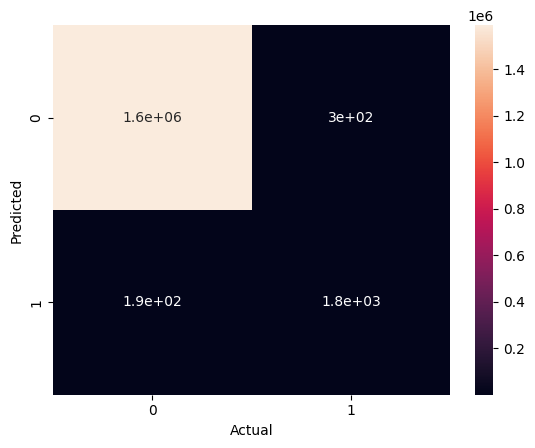

In [70]:
dt_pred = model.predict(X_test)
evaluate_model(y_test, dt_pred)

In [71]:
# Checking unique values
predictions = pd.DataFrame(dt_pred)
predictions[0].value_counts()

0
0    1588680
1       1975
Name: count, dtype: int64

In [74]:
pd.DataFrame(confusion_matrix(y_test, dt_pred))

,0,1
0,1588378,194
1,302,1781


### AdaBoost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

# Base estimator: shallow decision tree (typical for AdaBoost)
base_estimator = DecisionTreeClassifier(max_depth=1)


# AdaBoost model
ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada_model.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,100
,learning_rate,0.5
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


Accuracy Score:  0.9988413578054324
Precision Score:  1.0
Recall Score:  0.11521843494959194
F1 Score:  0.20662935858803272
Confusion Matrix:  [[1588572       0]
 [   1843     240]]


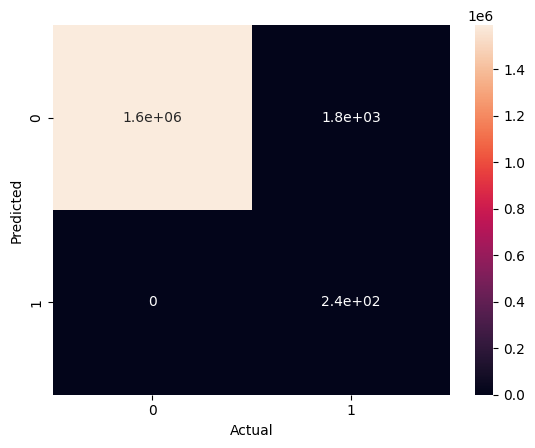

In [77]:
ada_pred = ada_model.predict(X_test)
evaluate_model(y_test, ada_pred)

In [78]:
# Checking unique values
predictions = pd.DataFrame(ada_pred)
predictions[0].value_counts()

0
0    1590415
1        240
Name: count, dtype: int64

In [87]:
conf_matrix = confusion_matrix(y_test, ada_pred)

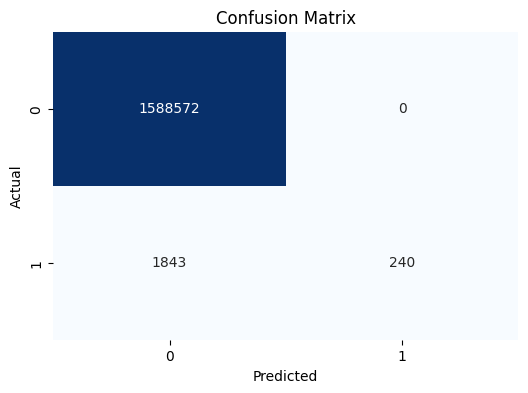

In [88]:
plt.figure(figsize=(6, 4))  # Adjust figure size as needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)  # fmt="d" for integers, cbar=False to remove colorbar
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

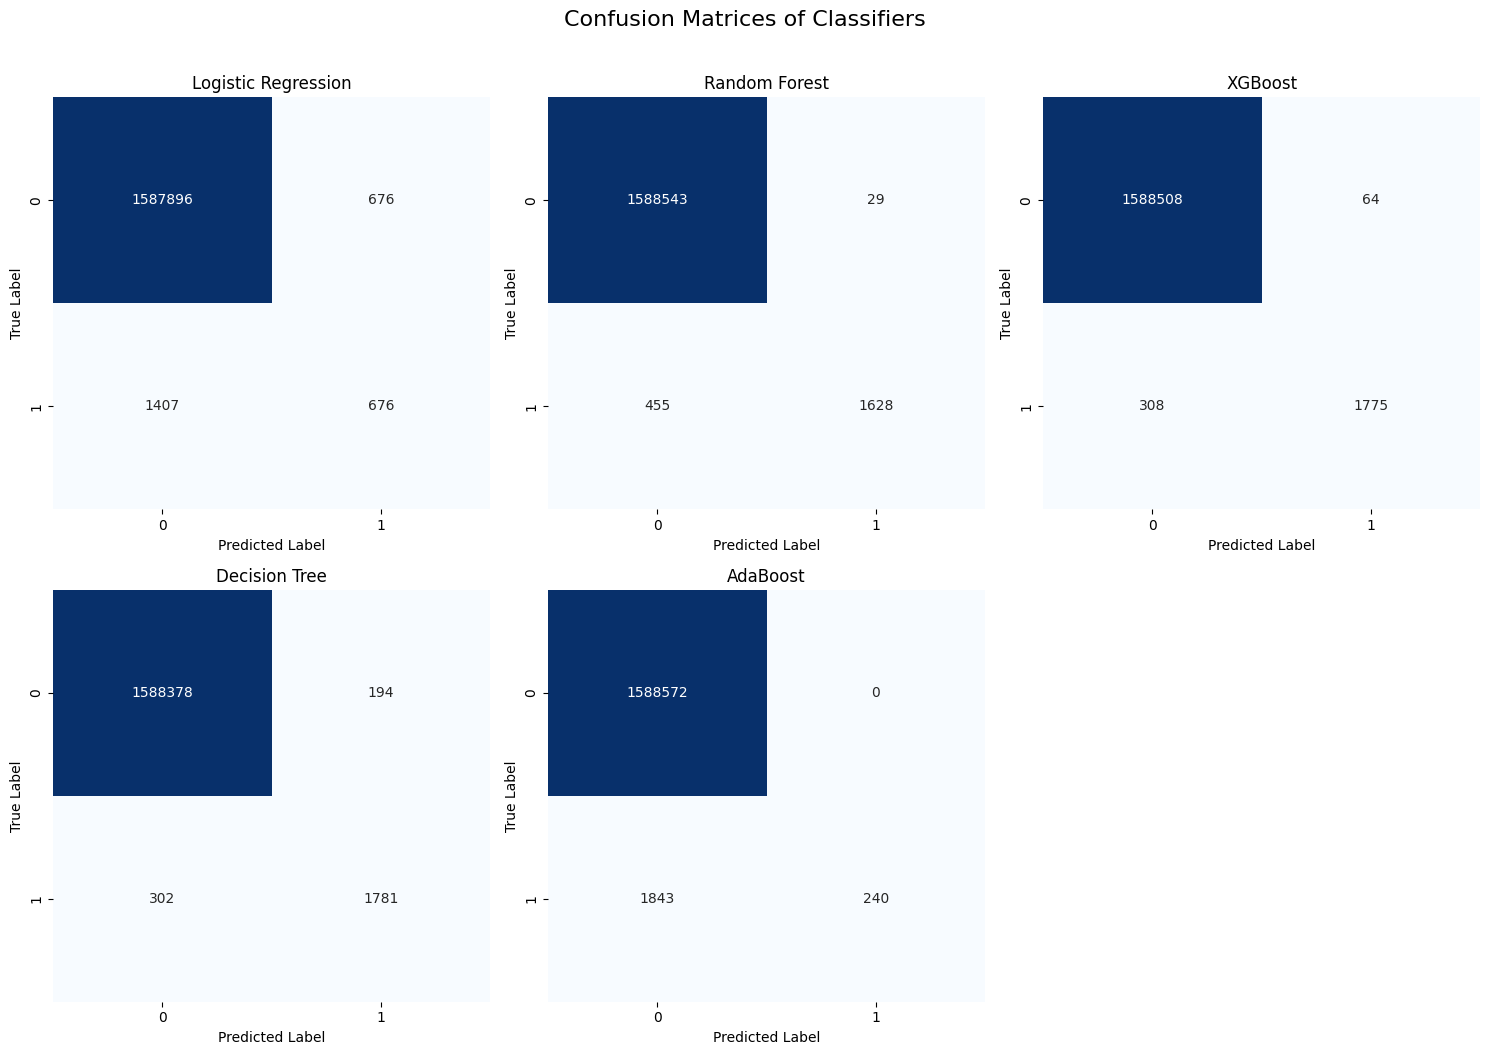

In [91]:

# y_true: actual labels (same for all models)
# y_pred_*: predicted labels for each model
# Replace these with your real data
y_true = y_test  # Ground truth labels
y_pred_logreg = lr_pred      # Logistic Regression
y_pred_rf = rfc_pred          # Random Forest
y_pred_xgb = pred6         # XGBoost
y_pred_dt = dt_pred          # Decision Tree
y_pred_ada = ada_pred         # AdaBoost

# Dictionary of model names and predictions
models = {
    'Logistic Regression': y_pred_logreg,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'Decision Tree': y_pred_dt,
    'AdaBoost': y_pred_ada,
}

# Plot settings
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_true, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Adjust layout and show
plt.tight_layout()
plt.suptitle('Confusion Matrices of Classifiers', fontsize=16, y=1.05)
plt.savefig("confusion_matrices for classifiers")
plt.show()

### Selecting Our Final Model

The final model used which had the best scores across all metrics will be the random forest classifier.

In [35]:
import joblib
joblib.dump(rfc, "credit_fraud.pkl")

['credit_fraud.pkl']

In [36]:
model = joblib.load("credit_fraud.pkl")